# RNN Assignment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/drive')

Mounted at /drive


## Preprocessing Data

### Fetching Data

In [ ]:
df = pd.read_csv('/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/6. Recurrent Neural Network/Frozen_Dessert_Production.csv', parse_dates = True, index_col = 'DATE')

In [ ]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


### Splitting Data

(528.0, 588.0)

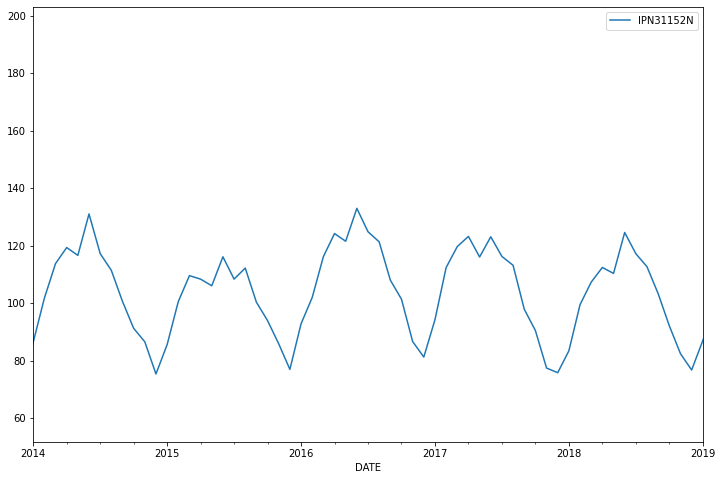

In [ ]:
df.plot(figsize = (12, 8))
plt.xlim('2014-01-10', '2019-01-01')

In [ ]:
len(df)/12

47.75

In [ ]:
len(df) - 18

555

In [ ]:
test_size = 18
test_ind = len(df) - test_size

In [ ]:
train = df[:test_ind]
test = df[test_ind:]

### Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Creating a Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
len(test)

18

In [ ]:
length = 12

generator = TimeseriesGenerator(data = scaled_train, targets = scaled_train, length = length, batch_size = 1)

In [ ]:
X,y = generator[0]

In [ ]:
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ]]])

In [ ]:
y

array([[0.01774221]])

In [ ]:
scaled_train[:length + 1]

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221]])

## Creating a Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

### Models

In [ ]:
n_features = 1

#### RNN model

In [ ]:
model1 = Sequential()

model1.add(SimpleRNN(units = 100, input_shape = (length, n_features), activation = 'tanh'))

model1.add(Dense(units = 1))

model1.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


#### LSTM model

In [ ]:
model2 = Sequential()

model2.add(LSTM(units = 100, input_shape = (length, n_features), activation = 'tanh'))

model2.add(Dense(units = 1))

model2.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss', patience = 2)

### Creating a Validation Generator

In [ ]:
validation_generator = TimeseriesGenerator(data = scaled_test, targets = scaled_test, length = length, batch_size = 1)

### Training Model

In [ ]:
model1.fit(generator, epochs = 20, callbacks = [earlystop], validation_data = validation_generator)

Epoch 1/20
543/543 [==============================] - 3s 4ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 2/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 3/20
543/543 [==============================] - 2s 4ms/step - loss: 0.0046 - val_loss: 0.0023


In [ ]:
model2.fit(generator, epochs = 20, callbacks = [earlystop], validation_data = validation_generator)

Epoch 1/20
543/543 [==============================] - 6s 7ms/step - loss: 0.0175
Epoch 2/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0040
Epoch 3/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0038
Epoch 4/20
543/543 [==============================] - 4s 6ms/step - loss: 0.0036
Epoch 5/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0035
Epoch 6/20
543/543 [==============================] - 4s 6ms/step - loss: 0.0034
Epoch 7/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0033
Epoch 8/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0032
Epoch 9/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0034
Epoch 10/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 11/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 12/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0029
Epoch 13/20
543/543 [====

## Evaluation

In [ ]:
losses1 = pd.DataFrame(model1.history.history)
losses2 = pd.DataFrame(model2.history.history)

### Plotting Losses

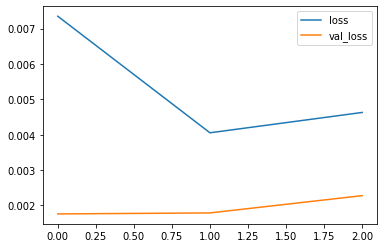

In [ ]:
losses1.plot()

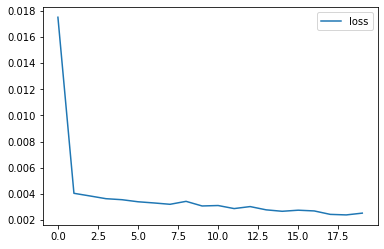

In [ ]:
losses2.plot()

### Creating a test for both models

#### For RNN model / model1

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):

  pred = model1.predict(current_batch)[0]

  test_predictions.append(pred)

  current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis = 1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['RNN Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### For LSTM model / model2

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):

  pred = model2.predict(current_batch)[0]

  test_predictions.append(pred)

  current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis = 1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['LSTM Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Plotting against Real Values

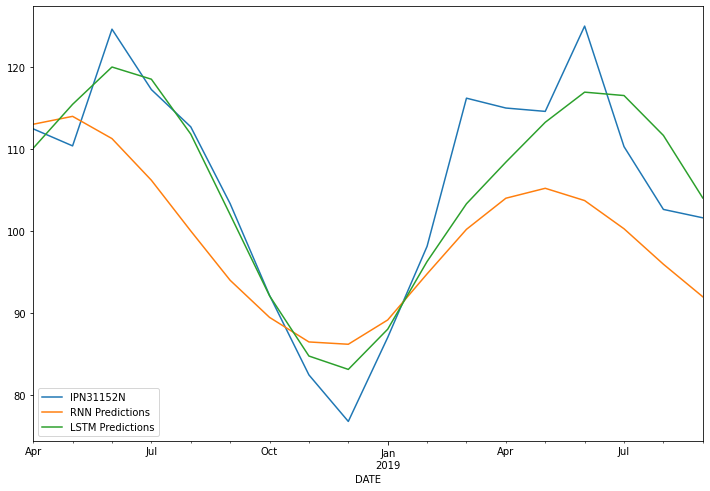

In [ ]:
test.plot(figsize = (12, 8))

## Forecasting

In [ ]:
full_scaler = MinMaxScaler()
full_scaled_data = scaler.fit_transform(df)

In [ ]:
length = 12

generator = TimeseriesGenerator(data = full_scaled_data, targets = full_scaled_data, length = length, batch_size = 1)

In [ ]:
model = Sequential()

model.add(LSTM(units = 100, input_shape = (length, n_features), activation = 'tanh'))

model.add(Dense(units = 1))

model.compile(loss = 'mse', optimizer = 'adam')

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator, epochs = 6)

Epoch 1/6
561/561 [==============================] - 6s 7ms/step - loss: 0.0177
Epoch 2/6
561/561 [==============================] - 4s 7ms/step - loss: 0.0044
Epoch 3/6
561/561 [==============================] - 4s 7ms/step - loss: 0.0037
Epoch 4/6
561/561 [==============================] - 4s 7ms/step - loss: 0.0037
Epoch 5/6
561/561 [==============================] - 4s 7ms/step - loss: 0.0037
Epoch 6/6
561/561 [==============================] - 4s 7ms/step - loss: 0.0031


In [ ]:
forecast = []

period = 12
first_eval_batch = full_scaled_data[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(period):

  pred = model.predict(current_batch)[0]

  forecast.append(pred)

  current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis = 1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


In [ ]:
forecast_index = pd.date_range('2019-10-01', periods = period, freq = 'MS')

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [ ]:
forecast_df

,Forecast
2019-10-01,87.218697
2019-11-01,80.913807
2019-12-01,81.434905
2020-01-01,87.958771
2020-02-01,96.959014
2020-03-01,106.155614
2020-04-01,113.420963
2020-05-01,118.633137
2020-06-01,120.640755
2020-07-01,117.279982


(584.0, 608.0)

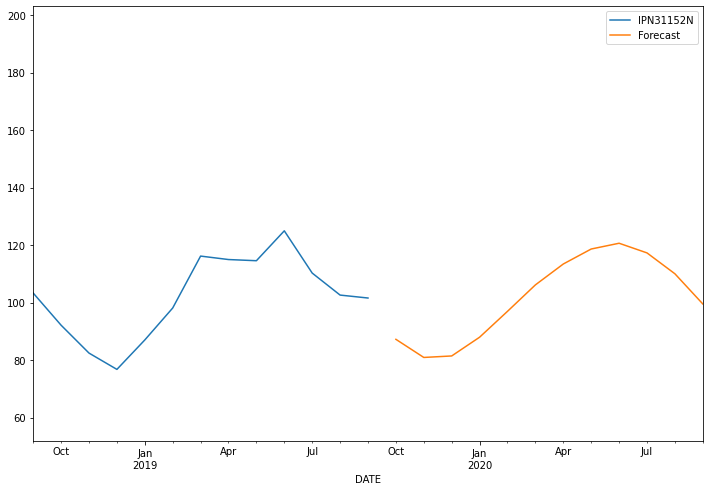

In [ ]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (12, 8))
plt.xlim('2018-09-01', '2020-09-01')

### Removing the Cut off from Plot

In [ ]:
forecast_df.columns = ['IPN31152N']
final_df = pd.concat([df, forecast_df], axis = 0)

In [ ]:
final_df

,IPN31152N
1972-01-01,59.962200
1972-02-01,67.060500
1972-03-01,74.235000
1972-04-01,78.112000
1972-05-01,84.763600
...,...
2020-05-01,118.633137
2020-06-01,120.640755
2020-07-01,117.279982
2020-08-01,110.019912


(584.0, 608.0)

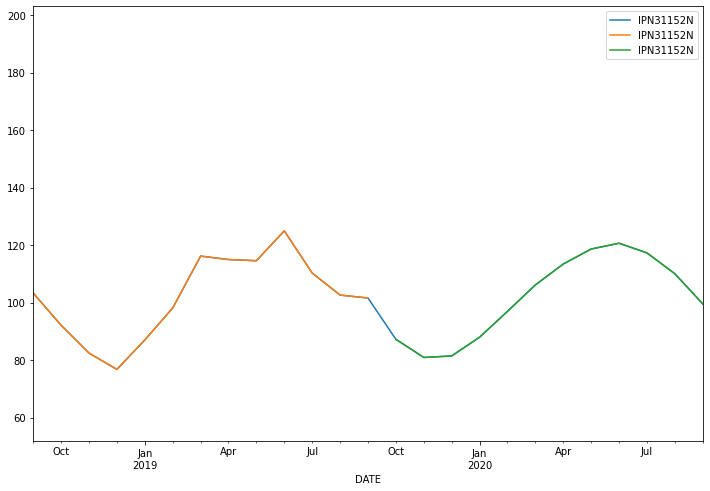

In [ ]:
ax = final_df.plot()
ax1 = df.plot(ax = ax)
forecast_df.plot(ax = ax1, figsize = (12, 8))
plt.xlim('2018-09-01', '2020-09-01')